# Project 5 : Ice Store Game Analysis

# Introduction

In this integrated project, analysis will be carried out on game sales data of various genres from several platforms. The data provided is in the form of sales data along with reviews from game experts and users throughout 2016.

From this data, we will then analyze the factors that influence game sales and test hypotheses to be able to conclude what games have the potential to be popular in the coming year.

## Goals

The aim of this project is to find out what games have the potential to be popular in the coming year and prove the following hypotheses:
1. Average user ratings for Xbox One and PC platforms are the same.
2. The average user rating for the action and sports genres is different.

## Steps

Sales data is stored in filepath : `/datasets/games.csv`.

Before carrying out the analysis and proving the hypothesis, first check the quality of the available data. First, an evaluation will be carried out regarding the quality of the data obtained and to investigate what significant problems have arisen. Then, during data pre-processing, data corrections will be made that have the potential to interfere with subsequent analysis so that bias in the results of data analysis can be avoided.

This project will consist of:
1. Data Overview and Data Pre-processing
- Initialization of initial data.
- Fixed data writing format.
- Fixed data types.
- resolve missing values.
- Enrich data quality.
- Checking clean data.
2. Data Exploration
- Study games by year of release.
- Study sales by platform.
- Study reviews from game experts and users.
- Study game genres.
3. Descriptive Statistical Analysis
- Study user profiles between regions.
- Testing hypotheses with statistical methods.
4. General Conclusion

# Data Overview and Pre-processing

## Initialization

To carry out data pre-processing, which aims to clean up problems in the data and then carry out hypothesis analysis, the first thing to do is import the required libraries:
1. `Library Pandas`
2. `Library Matplotlib`
3. `Library NumPy`
4. `Library Math`
5. `Library SciPy`

In [1]:
# Muat pandas library
import pandas as pd

# Muat matplotlib library
from matplotlib import pyplot as plt

# Muat numpy library
import numpy as np 

# Muat math library
import math
from math import factorial

# Muat scipy library
from scipy import stats as st

## Load Data

The initial stage of data pre-processing is to load the 2016 sales data .csv file from filepath: `/datasets/games.csv` and save it in the `game` variable.

In [2]:
# memuat file data penjualan dan menyimpannya dalam variabel game
game = pd.read_csv('/datasets/games.csv')

## Prepare Data

In [3]:
game.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
game.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [5]:
game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Findings**

Based on sample data, descriptions, and general data information, several things are known:
1. The data consists of 11 columns with data types in the form of `object` and `float`.
2. The data types of some columns are not relevant to the column titles and contents, such as the `User_Score` column.
3. A different number of non-nulls in the `Name`, `Year_Of_Release`, `Genre`, `Critic_Score`, `User_Score`, and `Rating` columns indicates that there are missing values in these three columns.
4. The oldest game release year was 1980, and the newest was 2016, meaning there are games released from old years that are still around until 2016.
5. The range of `Critic_Score` values is quite wide, with a score of `13.0 - 98.0`.
6. The format for writing column titles is in the form of capitalized words.

**Displays Amount / Percentage of Missing Data**

In [6]:
# menampilkan jumlah data yang hilang
game.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
# menampilkan persentase data yang hilang
a = game.count() # menghitung jumlah data pada setiap kolom exclude nilai NaN
b = game.fillna(-1).count() # menhitung total data pada setiap kolom dalam variabel game
c = pd.concat([a, b], axis=1)
c.columns = ['not_null', 'total']
c['null'] = c['total'] - c['not_null'] # membuat kolom jumlah data yang hilang pada setiap kolom dataframe game
c = c[['null', 'not_null', 'total']]
c['percent_null'] = c['null']*100 / c['total'] # menghitung persentase nilai yang hilang
c

,null,not_null,total,percent_null
Name,2,16713,16715,0.011965
Platform,0,16715,16715,0.000000
Year_of_Release,269,16446,16715,1.609333
Genre,2,16713,16715,0.011965
NA_sales,0,16715,16715,0.000000
EU_sales,0,16715,16715,0.000000
JP_sales,0,16715,16715,0.000000
Other_sales,0,16715,16715,0.000000
Critic_Score,8578,8137,16715,51.319174
User_Score,6701,10014,16715,40.089740


It can be seen that the percentage of missing data is quite high, especially in the `Critic_Score`, `user_Score`, and `Rating` columns, which have almost even reached 50%, and this is quite unreasonable because of the high percentage of missing data. Looking again at the descriptions of these three columns, it is possible that the NaN values come from game experts or users who do not provide reviews, or there are other factors, so further analysis is needed to overcome the missing values in these columns.

**Analyze Duplicate Data**

In [8]:
# menampilkan jumlah duplikasi eksplisit pada dataframe
game.duplicated().sum()

0

In [9]:
# menampilkan isi dari kolom name
game['Name'].value_counts()

Need for Speed: Most Wanted            12
FIFA 14                                 9
Madden NFL 07                           9
Ratatouille                             9
LEGO Marvel Super Heroes                9
                                       ..
Spyborgs                                1
Aquanaut's Holiday                      1
Secret of Mana                          1
Azure Striker Gunvolt: Striker Pack     1
Personal Trainer: Math                  1
Name: Name, Length: 11559, dtype: int64

It can be seen that there are several game names that have more than 1. Further analysis is needed to see whether these games have different platforms, release years, or different versions.

In [10]:
# menampilkan isi dari kolom platform
game['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [11]:
# menampilkan isi dari kolom genre
game['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [12]:
# menampilkan isi dari kolom genre
game['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

There is no duplicate in data frame.

**Next Step Plans**

Based on the results of initial data exploration, no implicit or explicit duplication problems were found in the data frame, but several other problems were found, including:
1. Inappropriate data types in the `Year_of_Release` and `User_Score` columns.
2. Quite a lot of data is missing in the `Critic_Score`, `User_Score`, and `Rating` columns, as well as some in the `Name`, `Year_of_Release`, and `Genre` columns.
3. Column title writing format using capitalized words.

To overcome these problems, the steps taken are:
1. Change the writing format for all column headings.
2. Change the data type in the `User_Score` column.
3. Fill in missing data in the `Name`, `Year_Of_Release`, `Critic_Score`, `User_Score`, and `Rating` columns.
4. Enrich additional information in the dataframe.

## Improve Data Quality

### Fixed Column Title

In [15]:
game.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


### Fixed Data Type

The next step is to correct the data type in the `year_of_release` column which is of type `float` to `integer` and `user_score` which is of type `object` to `float`. Because the `year_of_release` column has missing values, the data type conversion will be carried out at the next stage after correcting the missing values in that column.

In [16]:
# menampilkan isi kolom user_score
game['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
1         2
0.7       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

It can be seen that there is a `tbd` value in the user scoring column with a fairly high number, so the data type is `object`. Based on the project description, tbd is `to be determined` which may appear in the scoring column. The sample data will be checked.

In [17]:
# menampilkan data frame yang berisi score tbd
game_tbd_score = game[game['user_score'] == 'tbd']
game_tbd_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


It can be seen that the `user_score` value `tbd` occurs in various game names, platforms, release years, and genres; this indicates that the `tbd` value occurs randomly.

Because the `user_score` and `critic_score` columns are similar in that they contain scoring, the `tbd` value will be filled in based on the value in the `critic_score` column, which is converted to a scale of 1–10. To do this, first address the missing values in the `critic_score` column at a later stage.

### Fixed missing values

In [18]:
# cari strategi per-kolom

The next step is to address missing values in the column:
1. `name`
2. `year_Of_release`
3. `critic_score`
4. `user_score`
5. `rating`

#### `name` column

In [19]:
# menampilkan jumlah nilai yang hilang
game['name'].isna().sum()

2

In [20]:
# membuat dataframe baru null_game yang merupakan copy data game yang telah diisi sementara nilai yang hilang
null_name = game.copy(deep=True)

# mengganti sementara yang hilang dengan abc
null_name['name']= null_name['name'].fillna('abc')

In [21]:
# mengiris data frame yang memuat nama game abc
null_name[null_name['name'] == 'abc']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,abc,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,abc,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


It can be seen that the missing values in the name column come from the `GEN` platform, both of which were released in 1993. However, the first game achieved quite large sales in the NA and EU regions. We will check what games come from the `GEN` platform.

In [22]:
# mengiris data frame yang memuat nama platform GEN
null_name[(null_name['platform'] == 'GEN') & (null_name['year_of_release'] == 1993.0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,abc,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,abc,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


It can be seen that the name of the first abc game had the highest sales among all the `GEN` platform games released in 1993, so this missing value cannot be removed from the dataframe. The opposite happened in the second abc game. Because the values also occur in the genre column, critic score and user_score are also missing, the missing values in the name column will be removed from the dataframe.

In [23]:
game

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [24]:
# menghilangkan nilai yang hilang pada kolom nama dai dataframe game
game = game.dropna(subset=['name'])
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


The missing values in the `name` column have been successfully repaired, as well as in the `genre` column, so the missing values are then corrected in the `year_of_release` column.

#### Kolom `year_of_release`

In [25]:
# menampilkan jumlah nilai yang hilang
game['year_of_release'].isna().sum()

269

The `year_of_release` column contains information about the year the game was released, and this is quite related to which `platform' the game is played on; therefore, the information in the `platform` column and its distribution will be checked.

In [26]:
game.groupby('platform').count()

,name,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
platform,,,,,,,,,,
2600,133,116,133,133,133,133,133,0,0,0
3DO,3,3,3,3,3,3,3,0,0,0
3DS,520,512,520,520,520,520,520,168,230,228
DC,52,52,52,52,52,52,52,14,14,14
DS,2151,2121,2151,2151,2151,2151,2151,717,1272,1273
GB,98,97,98,98,98,98,98,0,0,0
GBA,822,811,822,822,822,822,822,438,517,522
GC,556,542,556,556,556,556,556,448,469,469
GEN,27,27,27,27,27,27,27,0,0,0


There are 31 different gaming `platforms`. You will see the distribution of missing data in this column.

In [27]:
# melihat jumlah nilai yang hilang dari setiap nilai pada kolom platform
d = game.groupby('platform')['year_of_release'].count() # melakukan grouping platform terhadap kolom year_of_release
e = game.fillna(-1).groupby('platform')['year_of_release'].count() # menghitung semua platform terhadap kolom year_of_release
f = pd.concat([d, e], axis=1)
f.columns = ['not_null', 'total']
f['null'] = f['total'] - f['not_null'] # membuat kolom jumlah data yang hilang
f = f[['null', 'not_null', 'total']]
f['percent_null'] = f['null']*100 / f['total'] # menghitung persentase data yang hilang 
f

,null,not_null,total,percent_null
platform,,,,
2600,17,116,133,12.781955
3DO,0,3,3,0.000000
3DS,8,512,520,1.538462
DC,0,52,52,0.000000
DS,30,2121,2151,1.394700
GB,1,97,98,1.020408
GBA,11,811,822,1.338200
GC,14,542,556,2.517986
GEN,0,27,27,0.000000


From the data above, it can be seen that almost all platforms have missing values in the `year_of_release` column. Based on percentages, it is known that the highest percentage of lost data occurred on the `2600` game platform, but in terms of numbers, the `PS2` and `WS` platforms had the most, namely `34` missing values.

Because the release year is related to the platform, the missing values in the year_of_release column will be filled with median values based on the parameters in the `platform` column.

In [28]:
# membuat variabel yang memuat informasi median tahun rilis berdasarkan platform
game_platform_median = game.pivot_table(index='platform', values='year_of_release', aggfunc='median')

In [29]:
# membuat dictionary median tahun release variabel game_platform_median
game_platform_median = game_platform_median['year_of_release'].to_dict()

In [30]:
# membuat fungsi untuk mengisi nilai yang hilang pada kolom yer_of_release
def year(a):
    platform = a['platform']
    year_of_release = a['year_of_release']
    if year_of_release == -1:
        return game_platform_median[platform]
    else:
        return year_of_release

In [31]:
# mengaplikasikan fungsi year
game['year_of_release'] = game[['platform', 'year_of_release']].fillna(-1).apply(year,axis=1)

/tmp/ipykernel_27/401172286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['year_of_release'] = game[['platform', 'year_of_release']].fillna(-1).apply(year,axis=1)


In [32]:
# menampilkan jumlah nilai yang hilang
game['year_of_release'].isna().sum()

0

Missing values in the `platform` column were successfully cleared. Next, fix the data type.

In [33]:
# mengubah tipedata kolom year_of_release
game['year_of_release'] = game['year_of_release'].astype('int')
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


/tmp/ipykernel_27/4077571735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['year_of_release'] = game['year_of_release'].astype('int')


The `year_of_release` column has successfully changed its data type to integer. Next, fix the missing values in the `critic_score` column.

#### Kolom `critic_score`

In [34]:
# menampilkan jumlah nilai yang hilang pada kolom critic_score
game['critic_score'].isna().sum()

8576

The critic_score column contains the rating given by game critics to each game name. Generally, the critic_score is influenced by the game's platform and genre. To ensure this, we will check the distribution of missing values in the `critic_score` column against the `platform` and `genre` column parameters.

In [35]:
# melihat jumlah nilai yang hilang dari setiap nilai pada kolom platform
g = game.groupby('platform')['critic_score'].count() # melakukan grouping platform terhadap kolom critic_score
h = game.fillna(-1).groupby('platform')['critic_score'].count() # menghitung semua platform terhadap kolom critic_score
i = pd.concat([g, h], axis=1)
i.columns = ['not_null', 'total']
i['null'] = i['total'] - i['not_null'] # membuat kolom jumlah data yang hilang
i = i[['null', 'not_null', 'total']]
i['percent_null'] = i['null']*100 / i['total'] # menghitung persentase data yang hilang 
i

,null,not_null,total,percent_null
platform,,,,
2600,133,0,133,100.000000
3DO,3,0,3,100.000000
3DS,352,168,520,67.692308
DC,38,14,52,73.076923
DS,1434,717,2151,66.666667
GB,98,0,98,100.000000
GBA,384,438,822,46.715328
GC,108,448,556,19.424460
GEN,27,0,27,100.000000


Based on the dataframe display above, it is known that almost all platforms have missing values in the `critic_score` column, and some are missing completely as is the case with several platforms such as: `2600`, `3DO`, `GB`, `GEN`, `NES ` and several other games.

Next, missing values will be checked based on the `genre` column parameter.

In [36]:
# melihat jumlah nilai yang hilang dari setiap nilai pada kolom genre
g = game.groupby('genre')['critic_score'].count() # melakukan grouping platform terhadap kolom critic_score
h = game.fillna(-1).groupby('genre')['critic_score'].count() # menghitung semua platform terhadap kolom critic_score
i = pd.concat([g, h], axis=1)
i.columns = ['not_null', 'total']
i['null'] = i['total'] - i['not_null'] # membuat kolom jumlah data yang hilang
i = i[['null', 'not_null', 'total']]
i['percent_null'] = i['null']*100 / i['total'] # menghitung persentase data yang hilang 
i

,null,not_null,total,percent_null
genre,,,,
Action,1479,1890,3369,43.900267
Adventure,980,323,1303,75.211051
Fighting,440,409,849,51.825677
Misc,1227,523,1750,70.114286
Platform,391,497,888,44.031532
Puzzle,356,224,580,61.379310
Racing,507,742,1249,40.592474
Role-Playing,761,737,1498,50.801068
Shooter,379,944,1323,28.647014


Almost all game `genres` have missing data in the `critic_score` column, where the highest percentage occurs in the `adventure` and `misc` genres. Because missing values occur randomly based on the exploration of missing values based on the `platform` and `genre` columns, they will be checked again based on the `year_of_release` column.

In [37]:
# melihat jumlah nilai yang hilang dari setiap nilai pada kolom year_of_release
g = game.groupby('year_of_release')['critic_score'].count() # melakukan grouping platform terhadap kolom genre
h = game.fillna(-1).groupby('year_of_release')['critic_score'].count() # menghitung semua platform terhadap kolom genre
i = pd.concat([g, h], axis=1)
i.columns = ['not_null', 'total']
i['null'] = i['total'] - i['not_null'] # membuat kolom jumlah data yang hilang
i = i[['null', 'not_null', 'total']]
i['percent_null'] = i['null']*100 / i['total'] # menghitung persentase data yang hilang 
i

,null,not_null,total,percent_null
year_of_release,,,,
1980,9,0,9,100.000000
1981,46,0,46,100.000000
1982,53,0,53,100.000000
1983,17,0,17,100.000000
1984,14,0,14,100.000000
1985,13,1,14,92.857143
1986,21,0,21,100.000000
1987,16,0,16,100.000000
1988,14,1,15,93.333333


Missing columns based on game release year also occur in all years, with the highest percentage generally being in games released before 1999, where the percentage is more than 50%. Based on this exploration, it can be concluded that the missing values in the `critic_score` column occur randomly, and the biggest possibility is that because this column is a critic's rating, it is a natural thing to happen if game critics do not provide reviews of the game in question.

To facilitate further analysis, missing values in the `critic_score` column will be filled with the median value based on each genre.

In [38]:
# menghapus sementara nilai yang hilang dan menyimpannya dalam variabel game_not_null
game_not_null= game.dropna()

In [39]:
# menampilkan median critic_score berdasarkan genre
genre_critic_median = game_not_null.pivot_table(index='genre', values='critic_score', aggfunc='median')

In [40]:
# mengubah variabel genre_critic_median menjadi dictionary
genre_critic_median_dict = genre_critic_median['critic_score'].to_dict()
genre_critic_median_dict

{'Action': 68.0,
 'Adventure': 66.0,
 'Fighting': 72.0,
 'Misc': 69.0,
 'Platform': 69.0,
 'Puzzle': 70.0,
 'Racing': 69.0,
 'Role-Playing': 74.0,
 'Shooter': 73.0,
 'Simulation': 70.0,
 'Sports': 75.0,
 'Strategy': 74.0}

In [41]:
# membuat fungsi untuk mengisi nilai yang hilang
def critic(x):
    genre = x['genre']
    critic_score = x['critic_score']
    if critic_score == -1:
        return genre_critic_median_dict[genre]
    else:
        return critic_score

In [42]:
# mengaplikasikan fungsi critic pada kolom critic_score
game['critic_score'] = game[['genre', 'critic_score']].fillna(-1).apply(critic, axis=1)

/tmp/ipykernel_27/639885112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['critic_score'] = game[['genre', 'critic_score']].fillna(-1).apply(critic, axis=1)


In [43]:
# menampilkan nilai yang hilang pada kolom critic_score
game['critic_score'].isna().sum()

0

Missing values in the `critic_score` column were successfully cleaned. Next is the `user_score` column.

#### `user_score` column

Based on the dataframe display above, it is known that almost all platforms have missing values in the `critic_score` column, and some are missing completely as is the case with several platforms such as: `2600`, `3DO`, `GB`, `GEN`, `NES ` and several other games.

Next, missing values will be checked based on the `genre` column parameter.

In [44]:
# menampilkan jumlah nilai yang hilang pada kolom user_score
game['user_score'].isna().sum()

6699

In [45]:
game.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


The `user_score` column contains almost the same data as `critic_score`, what is different is the value scale which is from 1-10. Generally `user_score` is also usually influenced by the `platform` and `genre` of the game. To ensure this, we will check the distribution of missing values in the `user_score` column against the `platform` and `genre` column parameters.

In [46]:
# melihat jumlah nilai yang hilang dari setiap nilai pada kolom platform
j = game.groupby('platform')['user_score'].count() # melakukan grouping platform terhadap kolom user_score
k = game.fillna(-1).groupby('platform')['user_score'].count() # menghitung semua platform terhadap kolom user_score
l = pd.concat([j, k], axis=1)
l.columns = ['not_null', 'total']
l['null'] = l['total'] - l['not_null'] # membuat kolom jumlah data yang hilang
l = l[['null', 'not_null', 'total']]
l['percent_null'] = l['null']*100 / l['total'] # menghitung persentase data yang hilang 
l

,null,not_null,total,percent_null
platform,,,,
2600,133,0,133,100.000000
3DO,3,0,3,100.000000
3DS,290,230,520,55.769231
DC,38,14,52,73.076923
DS,879,1272,2151,40.864714
GB,98,0,98,100.000000
GBA,305,517,822,37.104623
GC,87,469,556,15.647482
GEN,27,0,27,100.000000


Based on the dataframe display above, it is known that almost all platforms have missing values in the `user_score` column, and some are missing completely as is the case with several platforms such as: `2600`, `3DO`, `GB`, `GEN`, `GG ` and several other games.

Next, missing values will be checked based on the `genre` column parameter.

In [47]:
# melihat jumlah nilai yang hilang dari setiap nilai pada kolom genre
j = game.groupby('genre')['user_score'].count() # melakukan grouping platform terhadap kolom user_score
k = game.fillna(-1).groupby('genre')['user_score'].count() # menghitung semua platform terhadap kolom user_score
l = pd.concat([j, k], axis=1)
l.columns = ['not_null', 'total']
l['null'] = l['total'] - l['not_null'] # membuat kolom jumlah data yang hilang
l = l[['null', 'not_null', 'total']]
l['percent_null'] = l['null']*100 / l['total'] # menghitung persentase data yang hilang 
l

,null,not_null,total,percent_null
genre,,,,
Action,1163,2206,3369,34.520629
Adventure,844,459,1303,64.773599
Fighting,411,438,849,48.409894
Misc,862,888,1750,49.257143
Platform,321,567,888,36.148649
Puzzle,241,339,580,41.551724
Racing,375,874,1249,30.024019
Role-Playing,725,773,1498,48.397864
Shooter,300,1023,1323,22.675737


Almost all game `genres` have missing data in the `user_score` column, where the highest percentage occurs in the `adventure` genre. Since missing values occur randomly based on exploration of missing values based on `platform` and `genre` columns, missing values will be filled with the median `user_score` based on game `genre`.

Before dealing with missing columns, as in the previous analysis, at the stage of correcting the data type, we first converted the `tbd` score to match the value in `critic_score` by dividing by 10 (to get a scale of 1-10) for each game name.

In [48]:
# menampilkan kembali isi kolom user_score
game['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.5       2
1         2
0.7       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

In [49]:
# mengambil informasi nama game dan critic_score
critic_score = game[['name', 'critic_score']]
# mengubah index
critic_score = critic_score.set_index('name')

In [50]:
# mengubah variabel critic_score menjadi dictionary
critic_score_dict = critic_score['critic_score'].to_dict()

In [51]:
# membuat fungsi untuk mengubah nilai tbd sesuai user score
def user(y):
    name = y['name']
    user_score = y['user_score']
    if user_score == 'tbd':
        return critic_score_dict[name] / 10
    else:
        return user_score

In [52]:
# mengaplikasikan fungsi user
game['user_score'] = game[['name', 'user_score']].apply(user, axis=1)

/tmp/ipykernel_27/894604420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['user_score'] = game[['name', 'user_score']].apply(user, axis=1)


In [53]:
# menampilkan kembali isi kolom user_score
game['user_score'].value_counts()

6.9    486
7.0    359
7.8    324
8      290
8.2    282
      ... 
3.4      1
9.7      1
9.2      1
9.1      1
2.8      1
Name: user_score, Length: 162, dtype: int64

In [54]:
# mengubah tipe data kolom user_score
game['user_score'] = game['user_score'].astype('float')

/tmp/ipykernel_27/2316510040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['user_score'] = game['user_score'].astype('float')


Nilai `tbd` berhasil dikonversi menjadi numeric dan tipe data telah diperbaiki. Selanjutnya dilakukan tahap memperbaiki nilai yang hilang.

In [55]:
# menampilkan median user_score berdasarkan genre
game_not_null2 = game.dropna()

In [56]:
# menampilkan median critic_score berdasarkan genre
genre_user_median = game_not_null2.pivot_table(index='genre', values='user_score', aggfunc='median')

In [57]:
# mengubah variabel genre_critic_median menjadi dictionary
genre_user_median_dict = genre_user_median['user_score'].to_dict()
genre_user_median_dict

{'Action': 7.0,
 'Adventure': 6.6,
 'Fighting': 7.5,
 'Misc': 6.9,
 'Platform': 7.2,
 'Puzzle': 7.0,
 'Racing': 6.9,
 'Role-Playing': 7.8,
 'Shooter': 7.3,
 'Simulation': 7.0,
 'Sports': 7.5,
 'Strategy': 7.6}

In [58]:
# membuat fungsi untuk mengisi nilai yang hilang
def score(x):
    genre = x['genre']
    user_score = x['user_score']
    if user_score == -1:
        return genre_user_median_dict[genre]
    else:
        return user_score

In [59]:
# mengaplikasikan fungsi score pada kolom user_score
game['user_score'] = game[['genre', 'user_score']].fillna(-1).apply(score, axis=1)

/tmp/ipykernel_27/2708474589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['user_score'] = game[['genre', 'user_score']].fillna(-1).apply(score, axis=1)


In [60]:
# menampilkan nilai yang hilang pada kolom critic_score
game['user_score'].isna().sum()

0

Missing values in the `user_score` column were successfully cleaned. Next is the `rating` column.

#### `rating` column

In [61]:
# menampilkan jumlah nilai yang hilang pada kolom rating
game['rating'].isna().sum()

6764

Based on the project description, the rating column contains age rating information provided by the ESRB. It is possible that the lost value is from certain games whose release year was early or around 2000 or below or only occurred on certain platforms. To ensure this, we will check the distribution of missing values in the `platform` and `year_of_release` columns.

In [62]:
# melihat jumlah nilai yang hilang dari setiap nilai pada kolom platform
m = game.groupby('platform')['rating'].count() # melakukan grouping platform terhadap kolom rating
n = game.fillna(-1).groupby('platform')['rating'].count() # menghitung semua platform terhadap kolom rating
o = pd.concat([m, n], axis=1)
o.columns = ['not_null', 'total']
o['null'] = o['total'] - o['not_null'] # membuat kolom jumlah data yang hilang
o = o[['null', 'not_null', 'total']]
o['percent_null'] = o['null']*100 / o['total'] # menghitung persentase data yang hilang 
o

,null,not_null,total,percent_null
platform,,,,
2600,133,0,133,100.000000
3DO,3,0,3,100.000000
3DS,292,228,520,56.153846
DC,38,14,52,73.076923
DS,878,1273,2151,40.818224
GB,98,0,98,100.000000
GBA,300,522,822,36.496350
GC,87,469,556,15.647482
GEN,27,0,27,100.000000


All `platforms` have missing values in the `rating` column.

In [63]:
# melihat jumlah nilai yang hilang dari setiap nilai pada kolom year_of_release
m = game.groupby('year_of_release')['rating'].count() # melakukan grouping platform terhadap kolom rating
n = game.fillna(-1).groupby('year_of_release')['rating'].count() # menghitung semua platform terhadap kolom rating
o = pd.concat([m, n], axis=1)
o.columns = ['not_null', 'total']
o['null'] = o['total'] - o['not_null'] # membuat kolom jumlah data yang hilang
o = o[['null', 'not_null', 'total']]
o['percent_null'] = o['null']*100 / o['total'] # menghitung persentase data yang hilang 
o

,null,not_null,total,percent_null
year_of_release,,,,
1980,9,0,9,100.000000
1981,46,0,46,100.000000
1982,53,0,53,100.000000
1983,17,0,17,100.000000
1984,14,0,14,100.000000
1985,13,1,14,92.857143
1986,21,0,21,100.000000
1987,16,0,16,100.000000
1988,14,1,15,93.333333


Semua `year_of_release` memiliki nilai yang hilang pada kolom `rating`.

In [64]:
# menampilkan jumlah data berdasarkan parameter kolom rating
game['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Because missing values occur randomly and the `E` rating has the highest number of universal descriptors (`Everyone` according to the **ESRB**), the missing values will be replaced with an `E` rating.

In [65]:
# mengisi nilai yang hilang dengan rating E
game['rating'] = game['rating'].fillna('E')

/tmp/ipykernel_27/3757391891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['rating'] = game['rating'].fillna('E')


In [66]:
# menampilkan jumlah nilai yang hilang
game['rating'].isna().sum()

0

Missing values in the `rating` column were successfully cleaned.

### Improve Data Information

To facilitate data exploration and descriptive statistical analysis, a new column will be added:
1. `total_sales` - contains total sales from 4 regions.
2. `platform_id` - contains the game platform ID with details:
- PS2 - 1
- DS - 2
- PS3 - 3   
- Wii - 4   
- X360 - 5  
- PSP - 6   
- PS - 7    
- PC - 8     
- XB - 9     
- GBA - 10    
- GC - 11     
- 3DS - 12    
- PSV - 13    
- PS4 - 14    
- N64 - 15    
- XOne - 16   
- SNES - 17   
- SAT - 18    
- WiiU - 19   
- 2600 - 20   
- NES - 21     
- GB - 22      
- DC - 23      
- GEN - 24     
- NG - 25      
- WS - 26       
- SCD - 27      
- 3DO - 28      
- TG16 - 29     
- PCFX - 30     
- GG - 31       

**`total_sales` column**

Untuk mendapatkan total_sales setiap nama game, akan ditambahkan sales dari seluruh wilayah. Berdasarkan informasi proyek, satuan sales dalam `million usd`.

In [68]:
# menambahkan kolom total_sales pada dataframe game
game['total_sales'] = game['na_sales'] + game['eu_sales'] + game['jp_sales'] + game['other_sales']
game

/tmp/ipykernel_27/1181107990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['total_sales'] = game['na_sales'] + game['eu_sales'] + game['jp_sales'] + game['other_sales']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.2,E,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,E,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.0,E,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,7.5,E,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,6.6,E,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.0,7.2,E,0.01


**`platform_id` column**

In [69]:
# membuat fungsi untuk mengisi kolom platform_id
def platform(b):
    if 'PS2' in b:
        return 1
    elif 'DS' in b:
        return 2
    elif 'PS3' in b:
        return 3
    elif 'Wii' in b:
        return 4
    elif 'X360' in b:
        return 5
    elif 'PSP' in b:
        return 6
    elif 'PS' in b:
        return 7
    elif 'PC' in b:
        return 8
    elif 'XB' in b:
        return 9
    elif 'GBA' in b:
        return 10
    elif 'GC'in b:
        return 11 
    elif '3DS' in b:
        return 12
    elif 'PSV' in b:
        return 13
    elif 'PS4' in b:
        return 14
    elif 'N64' in b:
        return 15
    elif 'XOne' in b:
        return 16
    elif 'SNES' in b:
        return 17
    elif 'SAT' in b:
        return 18
    elif 'WiiU' in b:
        return 19
    elif '2600' in b:
        return 20
    elif 'NES' in b:
        return 21
    elif 'GB' in b:
        return 22
    elif 'DC' in b:
        return 23
    elif 'GEN' in b:
        return 24
    elif 'NG' in b:
        return 25
    elif 'WS' in b: 
        return 26
    elif 'SCD' in b:
        return 27
    elif '3DO' in b:
        return 28
    elif 'TG16' in b:
        return 29
    elif 'PCFX' in b:
        return 30
    elif 'GG' in b:
        return 31

In [70]:
game['platform_id'] = game['platform'].apply(platform)
game

/tmp/ipykernel_27/1784090163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game['platform_id'] = game['platform'].apply(platform)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_id
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,4
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.0,7.2,E,40.24,21
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,4
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,4
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,E,31.38,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.0,7.0,E,0.01,3
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,75.0,7.5,E,0.01,5
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,66.0,6.6,E,0.01,7
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69.0,7.2,E,0.01,10


# Data Exploration

## Year of Release

In [71]:
# mengelompokan jumlah game yang direlease tiap tahunnya
game_release = game.groupby('year_of_release')['name'].count()
game_release

year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     290
1998     386
1999     341
2000     350
2001     482
2002     829
2003     800
2004     783
2005     973
2006    1006
2007    1197
2008    1457
2009    1476
2010    1302
2011    1161
2012     653
2013     552
2014     582
2015     606
2016     502
Name: name, dtype: int64

Text(0.5, 0, 'Tahun rilis')

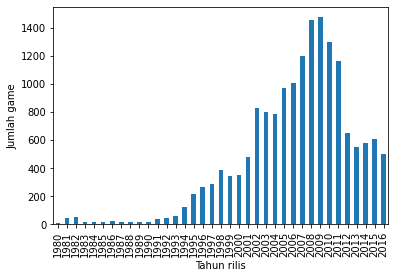

In [72]:
# membuat diaram batang jumlah game yang release ditiap tahunnya
game_release.plot(kind='bar')
plt.ylabel('Jumlah game')
plt.xlabel('Tahun rilis')

Based on the graph above, it can be seen that there is an increase in the number of games released each year, and the highest peak was in '2009', but starting in '2010' there was a decline in the number of games released.

## Game Platform

The first step will be to look at the platform with the highest total sales throughout 2016.

In [73]:
# mengelompokan total_sales berdasarkan platform
platform_sales = game.groupby('platform')['total_sales'].sum()
# melakukan sort secara descending
platform_sales = platform_sales.sort_values(ascending=False)
platform_sales

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Text(0.5, 0, 'platform')

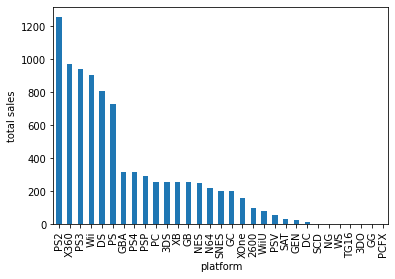

In [74]:
# membuat diagram batang dataframe platform_sales
platform_sales.plot(kind='bar')
plt.ylabel('total sales')
plt.xlabel('platform')

Based on the bar chart above, it can be seen that the `PS2` platform had the most `total_sales` throughout 2016, followed by the `X360`, `PS3`, `Wii`, and `DS` platforms, which had a value of more than `600 million USD`. You will see the data distribution.

In [75]:
# membuat pivot_table total_sales berdasarkan platform
platform_id_game = game.pivot_table(index='name', columns='platform_id', values='total_sales', aggfunc='sum')
platform_id_game

platform_id,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,31
name,,,,,,,,,,,,,,,,,,,,,
Beyblade Burst,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,NaN,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Frozen: Olaf's Quest,NaN,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tales of Xillia 2,NaN,NaN,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
thinkSMART: Chess for Kids,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uDraw Studio,NaN,NaN,NaN,2.42,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
uDraw Studio: Instant Artist,NaN,NaN,NaN,0.17,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0, 'platform')

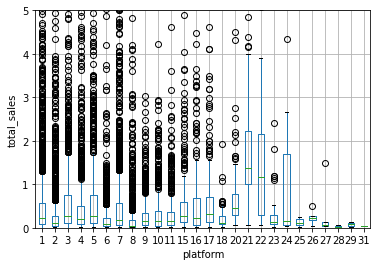

In [76]:
# membuat boxplot data penjualan game berdasarkan platform
platform_id_game.boxplot()
plt.ylim(0, 5)
plt.ylabel('total_sales')
plt.xlabel('platform')

In [77]:
# membuat pivot_table rata-rata penjualan game berdasarkan platform
game_avg_platform = game.pivot_table(index='platform', values='total_sales')
game_avg_platform

,total_sales
platform,
2600,0.729173
3DO,0.033333
3DS,0.498077
DC,0.306731
DS,0.374765
GB,2.606735
GBA,0.386679
GC,0.357788
GEN,1.050000


Text(0.5, 0, 'platform')

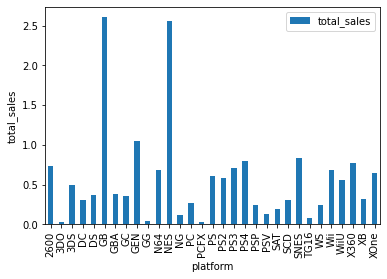

In [78]:
# menampilkan diagram batang
game_avg_platform.plot(kind='bar')
plt.ylabel('total_sales')
plt.xlabel('platform')

Based on the boxplot graph and bar chart, it can be seen that the average income and median value of `platform_id` 21(`NES`) and 22(`GB`) are the highest, while `platform_id` 1(`PS2`) has the highest sales of all platforms, the median value is around `0.25 million USD` and the average is `0.5 million USD`. On the `PS2` platform, there are quite a lot of outlier points, meaning that there are several games on the `PS2` platform whose income is far above the median value, thereby increasing the total_sales of the `PS2` platform.

Next, look at the total_sales distribution of the `PS2` platform based on the year the game was released.

In [79]:
# mengambil data game platform PS2
game_ps2 = game.query('platform == "PS2"')
game_ps2

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_id
17,Grand Theft Auto: San Andreas,PS2,2004,Action,9.43,0.40,0.41,10.57,95.0,9.0,M,20.81,1
24,Grand Theft Auto: Vice City,PS2,2002,Action,8.41,5.49,0.47,1.78,95.0,8.7,M,16.15,1
28,Gran Turismo 3: A-Spec,PS2,2001,Racing,6.85,5.09,1.87,1.16,95.0,8.4,E,14.97,1
38,Grand Theft Auto III,PS2,2001,Action,6.99,4.51,0.30,1.30,97.0,8.5,M,13.10,1
48,Gran Turismo 4,PS2,2004,Racing,3.01,0.01,1.10,7.53,89.0,8.5,E,11.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16670,Sugar + Spice! Anoko no Suteki na Nanimokamo,PS2,2008,Adventure,0.00,0.00,0.01,0.00,66.0,6.6,E,0.01,1
16671,Kanokon: Esuii,PS2,2008,Adventure,0.00,0.00,0.01,0.00,66.0,6.6,E,0.01,1
16683,Scarlett: Nichijou no Kyoukaisen,PS2,2008,Adventure,0.00,0.00,0.01,0.00,66.0,6.6,E,0.01,1
16689,Real Rode,PS2,2008,Adventure,0.00,0.00,0.01,0.00,66.0,6.6,E,0.01,1


In [80]:
# mengambil informasi total_sales platform PS2 ditiap tahunnya
game_ps2_year = game_ps2.pivot_table(index='name', columns='year_of_release', values='total_sales', aggfunc='sum')
game_ps2_year

year_of_release,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
name,,,,,,,,,,,,
.hack//G.U. Vol.1//Rebirth,NaN,NaN,NaN,NaN,NaN,NaN,0.17,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Vol.2//Reminisce,NaN,NaN,NaN,NaN,NaN,NaN,0.23,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Vol.2//Reminisce (jp sales),NaN,NaN,NaN,NaN,NaN,NaN,0.16,NaN,NaN,NaN,NaN,NaN
.hack//G.U. Vol.3//Redemption,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.17,NaN,NaN,NaN,NaN
.hack//Infection Part 1,NaN,NaN,1.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Zone of the Enders: The 2nd Runner,NaN,NaN,NaN,0.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eJay Clubworld,NaN,NaN,NaN,NaN,NaN,0.15,NaN,NaN,NaN,NaN,NaN,NaN
ef - a fairy tale of the two.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN


Text(0.5, 0, 'tahun rilis')

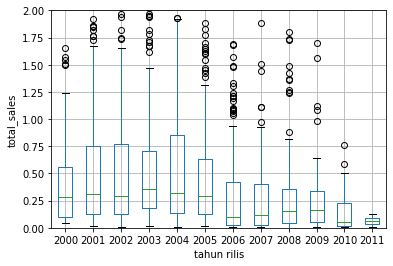

In [81]:
# menampilkan diagram
game_ps2_year.boxplot()
plt.ylim(0,2)
plt.ylabel('total_sales')
plt.xlabel('tahun rilis')

Based on the boxplot diagram, it can be seen that the `PS2` platform game released in `2003` had the highest revenue, and the release year `2010-2011` was the year the game was released with the lowest revenue. This possibility is happening because the next-generation gaming platform, namely PS3, has started to be released.

According to previous analysis, it is known that the `PS2` platform provides the highest revenue. We will check the most platform games and compare the total revenue between platforms.

In [82]:
# manmpilkan jumlah nama game yang sama pada kolom name
game['name'].value_counts()

Need for Speed: Most Wanted            12
FIFA 14                                 9
Madden NFL 07                           9
Ratatouille                             9
LEGO Marvel Super Heroes                9
                                       ..
Spyborgs                                1
Aquanaut's Holiday                      1
Secret of Mana                          1
Azure Striker Gunvolt: Striker Pack     1
Personal Trainer: Math                  1
Name: name, Length: 11559, dtype: int64

The game `Need for Speed: Most Wanted` is the one with the largest number of platforms. We will check the total income from this game on each platform.

In [83]:
# mengambil informasi dataframe nama game Need for Speed: Most Wanted
game_nfs_mult_platform = game.query('name == "Need for Speed: Most Wanted"')
game_nfs_mult_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_id
253,Need for Speed: Most Wanted,PS2,2005,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T,4.37,1
523,Need for Speed: Most Wanted,PS3,2012,Racing,0.71,1.46,0.06,0.58,69.0,6.9,E,2.81,3
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56,5
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25,5
1998,Need for Speed: Most Wanted,XB,2005,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T,1.04,9
2048,Need for Speed: Most Wanted,PSV,2012,Racing,0.33,0.45,0.01,0.22,69.0,6.9,E,1.01,7
3581,Need for Speed: Most Wanted,GC,2005,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T,0.56,11
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29,8
6273,Need for Speed: Most Wanted,WiiU,2013,Racing,0.13,0.12,0.00,0.02,69.0,6.9,E,0.27,4
6410,Need for Speed: Most Wanted,DS,2005,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E,0.27,2


Text(0.5, 0, 'platform')

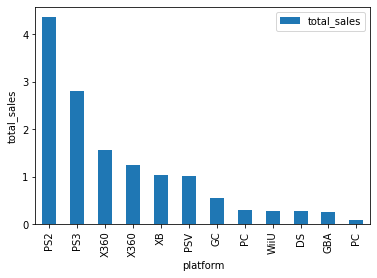

In [84]:
# mengambil informasi platform dan total sales
game_nfs = game_nfs_mult_platform[['platform', 'total_sales']]

# mengatur ulang index
game_nfs = game_nfs.set_index('platform')

# menampilkan diagram batang total pendapatan antar platform
game_nfs.plot(kind='bar')
plt.ylabel('total_sales')
plt.xlabel('platform')

For the distribution of the game 'Need for Speed: Most Wanted', it is known that the revenue from the `PS2` platform is also the highest revenue compared to other platforms, followed by the `PS` and `X360` platforms; this is almost the same as the total revenue from all games on these three platforms. However, to be sure, next we will check another game, namely `Ratatouille`.

In [85]:
# mengambil informasi dataframe nama game Ratatouille
game_rat_mult_platform = game.query('name == "Ratatouille"')
game_rat_mult_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,platform_id
1598,Ratatouille,DS,2007,Action,0.49,0.62,0.0,0.14,68.0,7.0,E,1.25,2
2442,Ratatouille,PS2,2007,Action,0.31,0.00,0.0,0.53,65.0,8.0,E,0.84,1
3069,Ratatouille,PSP,2007,Action,0.22,0.27,0.0,0.16,64.0,7.1,E,0.65,6
3902,Ratatouille,PS3,2007,Action,0.09,0.32,0.0,0.10,55.0,4.8,E,0.51,3
3948,Ratatouille,Wii,2007,Action,0.43,0.03,0.0,0.04,62.0,6.7,E,0.50,4
6398,Ratatouille,X360,2007,Action,0.23,0.02,0.0,0.02,56.0,6.8,E,0.27,5
7681,Ratatouille,GBA,2007,Action,0.14,0.05,0.0,0.00,65.0,6.8,E,0.19,10
9015,Ratatouille,GC,2007,Action,0.11,0.03,0.0,0.00,60.0,5.6,E,0.14,11
14514,Ratatouille,PC,2007,Action,0.01,0.01,0.0,0.00,68.0,7.9,E,0.02,8


Text(0.5, 0, 'platform')

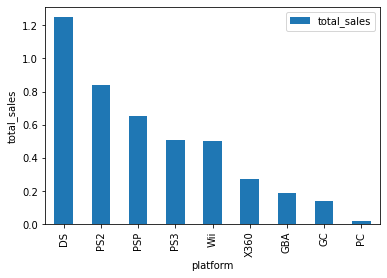

In [86]:
# mengambil informasi platform dan total sales
game_rat = game_rat_mult_platform[['platform', 'total_sales']]
game_rat
# mengatur ulang index
game_rat = game_rat.set_index('platform')

# menampilkan diagram batang total pendapatan antar platform
game_rat.plot(kind='bar')
plt.ylabel('total_sales')
plt.xlabel('platform')

Based on the graph above, things can be seen that are slightly different, where the `DS` platform provides higher income, followed by `PS2`. Both of these platforms are included in the top 5 platforms with the most total revenue.

## Critic_Score dan User_Score

At this stage, we will see that the game expert and user ratings correlate directly with the game's total_sales in 2016. The first step is to provide a dataframe of information on `total_sales`, `critic_rating` and `user_score`.

In [87]:
# menyimpan data frame yang memuat informasi total_sales, critic_score, dan user_score
sales_based_rating = game[['critic_score', 'user_score', 'total_sales']]
sales_based_rating

,critic_score,user_score,total_sales
0,76.0,8.0,82.54
1,69.0,7.2,40.24
2,82.0,8.3,35.52
3,80.0,8.0,32.77
4,74.0,7.8,31.38
...,...,...,...
16710,68.0,7.0,0.01
16711,75.0,7.5,0.01
16712,66.0,6.6,0.01
16713,69.0,7.2,0.01


              critic_score  user_score  total_sales
critic_score      1.000000    0.587328     0.195062
user_score        0.587328    1.000000     0.089827
total_sales       0.195062    0.089827     1.000000


array([[<AxesSubplot:xlabel='critic_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='critic_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='critic_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='user_score', ylabel='user_score'>,
        <AxesSubplot:xlabel='total_sales', ylabel='user_score'>],
       [<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='total_sales'>,
        <AxesSubplot:xlabel='total_sales', ylabel='total_sales'>]],
      dtype=object)

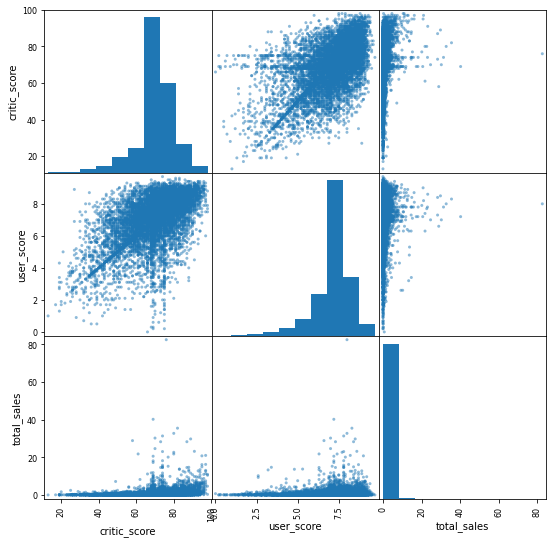

In [88]:
# menampilkan matriks korelasi dan grafik matriks sebar terhadap parameter total_sales, critic_score dan user_score
print(sales_based_rating.corr())
pd.plotting.scatter_matrix(sales_based_rating, figsize=(9,9))

From the correlation matrix data and scatter matrix graph, information is obtained:

It can be seen in the first graph from the bottom of the critic_score and user_score columns that the increase in the 'critic_score' and 'user_score' values does not have a significant impact on the total_sale value, although several points are seen that are quite high above the value of 60 in `critic_score` and above 5.0 in `user_score`. This is also proven by the correlation matrix values, both of which are close to **0**, which indicates that the relationship between game critics and user ratings is not significantly related to game revenue.

## Game Genre

At this stage, we will look at the game genres that have the highest revenue and how they are distributed. The first step is to provide total revenue information by genre.

In [89]:
# menyimpan data frame yang memuat informasi total_sales berdasarkan genre
game_genre_sales = game.groupby('genre')['total_sales'].sum()
game_genre_sales

genre
Action          1744.17
Adventure        237.59
Fighting         447.53
Misc             802.51
Platform         827.77
Puzzle           242.57
Racing           728.67
Role-Playing     934.56
Shooter         1052.45
Simulation       389.97
Sports          1331.27
Strategy         174.23
Name: total_sales, dtype: float64

Text(0.5, 0, 'platform')

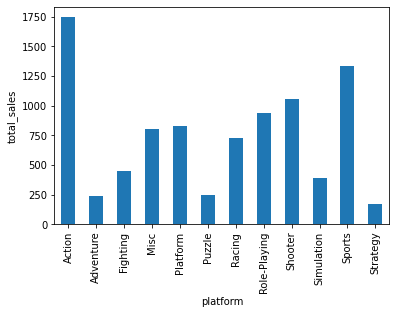

In [90]:
# menampilkan diagram batang total penjualan berdasarkan genre
game_genre_sales.plot(kind='bar')
plt.ylabel('total_sales')
plt.xlabel('platform')

Based on the graph above, it can be seen that the 'Action' genre provides the highest total income, followed by the 'Sports' genre, perhaps this genre is most popular with game lovers. Next, the distribution will be checked using a boxplot graph.

(0.0, 3.5)

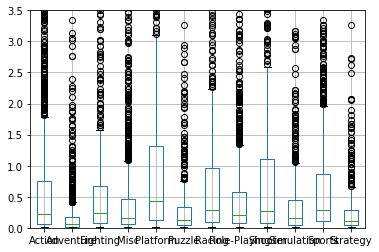

In [91]:
# membuat pivot_table total_sales ditiap genre
game_genre_sales = game.pivot_table(index='name', columns='genre', values='total_sales', aggfunc='sum')

# menampilkan grafik boxplot distribusi total_sales berdasarkan genre
game_genre_sales.boxplot()
plt.ylim(0,3.5)

Based on the boxplot diagram, it is known that the median of the `platform' genre is the highest, where based on total income, this genre is at number 5, while for the `action' and `sports' genres, the median value is around `0.25 million USD. Based on this graph, it can be concluded that games in the 'action' and 'sports' genres do not always provide the highest income, and this also applies to other game genres.

# Descriptive Statistical Analysis

## User Behavaior

Pada tahap ini, akan dilakukan analisa prilaku pengguna di wilayah `NA`, `EU` dan `JP` terhadap total pendapatan berdasarkan `platform` dan `genre`.

### Platofrm

In [94]:
# menyediakan dataframe informasi penjualan beberapa wilayah berdasarkan paltform
game_platform_area = game.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
game_platform_area

,na_sales,eu_sales,jp_sales
platform,,,
2600,90.60,5.47,0.00
3DO,0.00,0.00,0.10
3DS,83.49,61.48,100.67
DC,5.43,1.69,8.56
DS,382.40,188.89,175.57
GB,114.32,47.82,85.12
GBA,187.54,75.25,47.33
GC,133.46,38.71,21.58
GEN,19.27,5.52,2.67


Text(0, 0.5, 'sales')

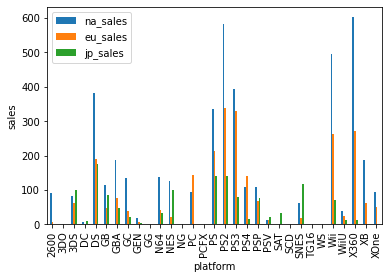

In [95]:
# menampilkan diagram batang dataframe game_platform_area
game_platform_area.plot(kind='bar')
plt.ylabel('sales')

**Findings**

Based on the graph above, the following information is known:
1. For the `NA` area, the 5 platforms with the highest revenue are X360, PS2, Wii, PS3, and DS.
2. For the `EU` region, the 5 platforms with the highest revenue are PS2, PS3, X360, Wii, and DS.
3. For the `JP` area, the 5 platforms with the highest revenue are DS, PS, PS2, SNES, NES.

From the information above, it is known that there are similar market similarities in the `NA` and `JP` areas because the platforms with the highest revenues are almost the same, namely the platforms: PS2, X360, PS3, Wii, and DS. Different things happen in the JP region, where there are platforms with low revenues in the NA and EU regions, but in the JP region there are platforms with high revenues, such as PS, SNES, and NES, although the DS and PS2 platforms also get high revenues in this region.

Based on the game platform, it can be concluded that the NA and EU regions have similar market shares, but the JP region has relatively different market shares.

### Genre

In [97]:
# menyediakan dataframe informasi penjualan beberapa wilayah berdasarkan genre
game_genre_area = game.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()
game_genre_area

,na_sales,eu_sales,jp_sales
genre,,,
Action,879.01,519.13,161.43
Adventure,105.26,63.54,52.30
Fighting,223.36,100.33,87.48
Misc,407.27,212.74,108.11
Platform,445.50,200.35,130.83
Puzzle,122.87,50.01,57.31
Racing,359.35,236.51,56.71
Role-Playing,330.81,188.71,355.41
Shooter,592.24,317.34,38.76


Text(0, 0.5, 'sales')

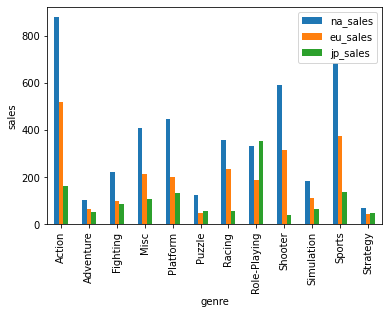

In [98]:
# menampilkan diagram batang dataframe game_genre_area
game_genre_area.plot(kind='bar')
plt.ylabel('sales')

**FIndings**

Based on the graph above, the following information is known:
1. For the `NA` area, the 5 genres with the highest income are action, sports, shooter, platform, and misc.
2. For the `EU` area, the 5 genres with the highest income are action, sports, shooter, racing, and misc.
3. For the `JP` area, the 5 genres with the highest income are role-playing, action, sports, platform, and misc.

From the information above, it is known that there are similar market shares in the `NA` and `JP` areas because the genres with the highest revenues are almost the same, namely: action, sports, shooter, and misc. Different things happen in the JP region, where the genre with the highest income is the role-playing genre, even though action, sports, platform, and misc genres also get high revenues in these three regions.

Based on game 'genre', it is concluded that the NA and EU regions have similar market shares, but the JP region has slightly different market shares.

### ESRB Rating

In [100]:
# Sediakan informasi pendapatan tiap wilayah based rating ESRB.
game_esrb_rating = game.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
game_esrb_rating

,na_sales,eu_sales,jp_sales
rating,,,
AO,1.26,0.61,0.00
E,2533.67,1323.55,1040.04
E10+,353.32,188.52,40.20
EC,1.53,0.11,0.00
K-A,2.56,0.27,1.46
M,748.48,483.97,64.24
RP,0.00,0.08,0.00
T,759.75,427.03,151.40


Text(0, 0.5, 'sales')

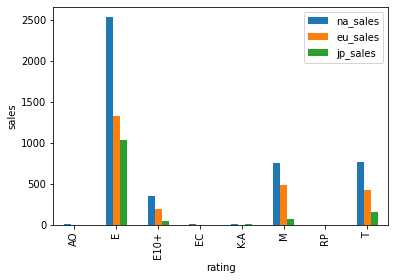

In [101]:
# menampilkan diagram batang dataframe game_esrb_rating
game_esrb_rating.plot(kind='bar')
plt.ylabel('sales')

In [124]:
# membuat pivot tabel pendapatan game berdasarkan rating ESRB
game_sales_esrb = game.pivot_table(index='name', columns='rating', values='total_sales', aggfunc='sum')
game_sales_esrb

rating,AO,E,E10+,EC,K-A,M,RP,T
name,,,,,,,,
Beyblade Burst,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN
Fire Emblem Fates,NaN,1.67,NaN,NaN,NaN,NaN,NaN,NaN
Frozen: Olaf's Quest,NaN,1.10,NaN,NaN,NaN,NaN,NaN,NaN
Haikyu!! Cross Team Match!,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN
Tales of Xillia 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.84
...,...,...,...,...,...,...,...,...
thinkSMART: Chess for Kids,NaN,0.01,NaN,NaN,NaN,NaN,NaN,NaN
uDraw Studio,NaN,2.42,NaN,NaN,NaN,NaN,NaN,NaN
uDraw Studio: Instant Artist,NaN,0.19,NaN,NaN,NaN,NaN,NaN,NaN


(0.0, 5.0)

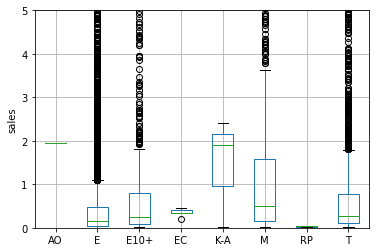

In [126]:
# menampilkan diagram boxplot
game_sales_esrb.boxplot()
plt.ylabel('sales')
plt.ylim(0,5)

Based on the bar diagram and boxplot graph above, it is known that game ratings provide different income from one another, where the highest income occurs in the `E(everyone)` rating, but the highest median income is in the `K-A(kids to Adult)` rating, meaning `E` rated games do not always get high revenues.

## Testing Hypotheses

At this stage, a hypothesis test will be carried out which has previously been formulated in the goals sub-chapter:
1. Average user ratings for Xbox One and PC platforms are the same.
2. The average user rating for the Action and Sports genres is different.

**1. Testing the Hypothesis the average user rating of Xbox One and PC platforms is the same**

To test this hypothesis, H0 and H1 will first be determined, because the hypothesis states the same values, then the hypothesis will be used as H0 and H1 which are the opposite:
- H0: The average user rating of the Xbox One and PC platforms is the same
- H1: The average user rating of the Xbox One and PC platforms is different

Because H1 states that the possible results are 2-way differences (bigger or smaller than the other) then the statistical test of the `2-way hypothesis between 2 populations` is used using `alpha = 0.05%`.

To test the hypothesis above, information will be taken from the `game` dataframe of user ratings of the `XBox One(XOne)` platform and the `PC` platform.

In [108]:
# mengambil informasi platform game XOne dan menyimpannya dalam variabel game_plat_xone
game_plat_xone = game.query('platform == "XOne"')

# mengambil informasi platform game PC dan menyimpannya dalam variabel game_plat_pc
game_plat_pc = game.query('platform == "PC"')

In [117]:
# mengambil informasi platform dan user_score variabel game_plat_xone
game_xone_score = game_plat_xone[['name', 'platform', 'user_score']]
game_xone_score

,name,platform,user_score
99,Call of Duty: Black Ops 3,XOne,7.3
165,Grand Theft Auto V,XOne,7.9
179,Call of Duty: Advanced Warfare,XOne,5.4
242,Halo 5: Guardians,XOne,6.4
270,Fallout 4,XOne,6.2
...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,8.2
16643,Rugby Challenge 3,XOne,6.6
16645,ZombiU,XOne,7.0
16660,Prison Architect,XOne,6.7


In [118]:
# mengambil informasi platform dan user_score game_plat_pc
game_pc_score = game_plat_pc[['name', 'platform', 'user_score']]
game_pc_score

,name,platform,user_score
85,The Sims 3,PC,7.6
138,World of Warcraft,PC,7.3
192,Diablo III,PC,4.0
195,Microsoft Flight Simulator,PC,7.0
218,StarCraft II: Wings of Liberty,PC,8.2
...,...,...,...
16690,Pony Friends 2,PC,7.0
16692,Metal Gear Solid V: Ground Zeroes,PC,7.6
16696,Breach,PC,5.8
16702,STORM: Frontline Nation,PC,7.2


In [111]:
# Menampilkan variansi kedua sampel
var_xone_score = np.var(game_xone_score['user_score'])
var_pc_score = np.var(game_pc_score['user_score'])
print(f'Variansi rating pengguna XOne : {var_xone_score}')
print(f'Variansi rating pengguna PC : {var_pc_score}')

Variansi rating pengguna XOne : 1.4997252864331492
Variansi rating pengguna PC : 1.8780773625558145


In [112]:
# Menguji hipotesis
alpha = 0.05

results1 = st.ttest_ind(game_xone_score['user_score'], game_pc_score['user_score'], equal_var=False)

print('p-value : ', results1.pvalue)

if results1.pvalue < alpha:
    print('Menolak hipotesis nol')
else:
    pint('Tidak dapat menolak hipotesis nol')

p-value :  2.6197688557368764e-06
Menolak hipotesis nol


Based on the hypothesis test above, the result is `rejects the null hypothesis` which is that the average user ratings of the XBox One and PC platforms are significantly different.

**2. Testing the hypothesis that the average user rating for the Action and Sports genres is different.**

To test this hypothesis, H0 and H1 will first be determined because the hypothesis states a difference in value, then the hypothesis will be used as H1 and H0 are the opposite:
- H0: The average user rating for the action and sports genres is the same.
- H1: The average user rating for the action and sports genres is different.

Because H1 states that the possible results are 2-way differences (bigger or smaller than the other), the statistical test of the `2-way hypothesis between 2 populations' is used using `alpha = 0.05%`.

To test the hypothesis above, user rating information for the `action` and `sport` genres will be taken from the `game` data frame.

In [114]:
# mengambil informasi genre game Action dan menyimpannya dalam variabel game_genre_action
game_genre_action = game.query('genre == "Action"')

# mengambil informasi genre game Sports dan menyimpannya dalam variabel game_genre_sports
game_genre_sports = game.query('genre == "Sports"')

In [120]:
# mengambil informasi genre dan user_socore variabel game_genre_action
game_action_score = game_genre_action[['name', 'genre', 'user_score']]
game_action_score

,name,genre,user_score
16,Grand Theft Auto V,Action,8.2
17,Grand Theft Auto: San Andreas,Action,9.0
23,Grand Theft Auto V,Action,8.1
24,Grand Theft Auto: Vice City,Action,8.7
38,Grand Theft Auto III,Action,8.5
...,...,...,...
16692,Metal Gear Solid V: Ground Zeroes,Action,7.6
16694,Carmageddon 64,Action,7.0
16695,Planet Monsters,Action,6.7
16699,The Longest 5 Minutes,Action,7.0


In [121]:
# mengambil informasi platform dan user_score variabel game_genre_sports
game_sports_score = game_genre_sports[['name', 'genre', 'user_score']]
game_sports_score

,name,genre,user_score
0,Wii Sports,Sports,8.0
3,Wii Sports Resort,Sports,8.0
13,Wii Fit,Sports,7.7
15,Wii Fit Plus,Sports,7.4
77,FIFA 16,Sports,4.3
...,...,...,...
16676,G1 Jockey 4 2008,Sports,7.5
16688,Outdoors Unleashed: Africa 3D,Sports,7.5
16693,PGA European Tour,Sports,7.5
16700,Mezase!! Tsuri Master DS,Sports,7.5


In [122]:
# Menampilkan variansi kedua sampel
var_action_score = np.var(game_action_score['user_score'])
var_sports_score = np.var(game_sports_score['user_score'])
print(f'Variansi rating pengguna genre Action : {var_action_score}')
print(f'Variansi rating pengguna genre Sports : {var_sports_score}')

Variansi rating pengguna genre Action : 1.2460439442224651
Variansi rating pengguna genre Sports : 1.491210671882845


In [123]:
# Menguji hipotesis
alpha = 0.05

results2 = st.ttest_ind(game_action_score['user_score'], game_sports_score['user_score'], equal_var=False)

print('p-value : ', results2.pvalue)

if results2.pvalue < alpha:
    print('Menolak hipotesis nol')
else:
    pint('Tidak dapat menolak hipotesis nol')

p-value :  3.793443361147117e-10
Menolak hipotesis nol


Based on the hypothesis test above, the result is `rejects the null hypothesis` which is that the average user ratings for the 'Action' and 'Sports' genres are significantly different.

# General Conclusion

The data obtained is sales data for the video game online store "Ice" throughout the world throughout 2016. The data contains 11 columns and 16715 rows of data. There were several problems found in the data frame, including:
1. Inappropriate data types in the `Year_of_Release` and `User_Score` columns.
2. Quite a lot of data is missing in the `Critic_Score`, `User_Score`, and `Rating` columns, as well as some in the `Name`, `Year_of_Release`, and `Genre` columns.
3. Column title writing format using capitalized words.

To overcome these problems, the steps taken are:
1. Change the writing format for all column headings.
2. Change the data type in the `User_Score` column.
3. Fill in missing data in the `Name`, `Year_Of_Release`, `Critic_Score`, `User_Score`, and `Rating` columns.
4. Enrich additional information in the data frame.

After the dataframe was cleaned from the problems above, data exploration was carried out, and the following information was obtained:
1. Games released in `2009` have the highest revenue.
2. The platform with the highest revenue is the `PS` platform, followed by the `X360`, `PS3`, `Wii`, and `DS` platforms.
3. The high or low ratings of game critics and users do not have a significant effect on game revenue.
4. The game genre with the highest total revenue is the 'Action' genre, but games with the 'Action' genre do not always get high revenues.
5. The behavior of users in the `NA` and `EU` regions is almost the same regarding game platforms and genres, where the PS2 platform and the `Action` game genre have the highest market share in this region, but different things happen to users in the `JP` region, where the market share is the highest in this region, which is the `DS` platform with the `Role-Playing` game genre.
6. ESRB game ratings also influence game revenue.

Based on statistical hypothesis testing, it is concluded:
1. The average user ratings for the `Xbox One` and `PC` platforms are significantly different.
2. The average user ratings for the `Action` and `Sports` genres are significantly different.